In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df = pd.read_json('training_json_file.json')

In [11]:
df.head()

,cleaned_html,label
0,,1700
1,1 U.S. 20 1 Dall. 20 1 L.Ed. 19 ANONYMOUS. No....,1700
2,1 U.S. 18 1 Dall. 18 1 L.Ed. 18 The Lessee of ...,1700
3,1 U.S. 194 1 Dall. 194 1 L.Ed. 96 Gerardv.La C...,1700
4,1 U.S. 210 1 Dall. 210 1 L.Ed. 104 Pollardv.Sh...,1700


In [12]:
filter = df["cleaned_html"] != ""
filtered_df = df[filter]
filtered_df = filtered_df.dropna()

2000    26977
1900    23179
1800     9762
1700      137
Name: label, dtype: int64


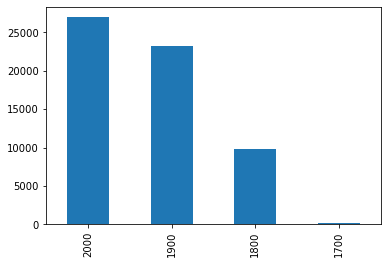

In [13]:
filtered_df['label'].value_counts().plot(kind='bar')
print(filtered_df['label'].value_counts())

In [14]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [15]:
X = []
sentences = list(filtered_df["cleaned_html"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = filtered_df.label.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [17]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [20]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dict = {}

glove_file = open('glove.840B.300d.txt', encoding='utf-8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:])
    embeddings_dict[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(4, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compiles(loss='binary_crossentropy', optimizer='adam')
